<a href="https://colab.research.google.com/github/adeoluafo/FDSDE_AAfolabi/blob/main/HW8/AdeoluwaAfolabi_NN101_MNISTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this homework is to create three neural network to solve the same problem and compare the performance of each. The problem is the classic prediction of hand written digits. We use the MNIST benchmark dataset which contains 60,000 images of handwritten digits and the corresponding labels

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#download the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# how many labels are available?
y_train.shape

(60000,)

In [ ]:
#what is the shape of the postage stamps that constitute the dataset?
x_train.shape

(60000, 28, 28)

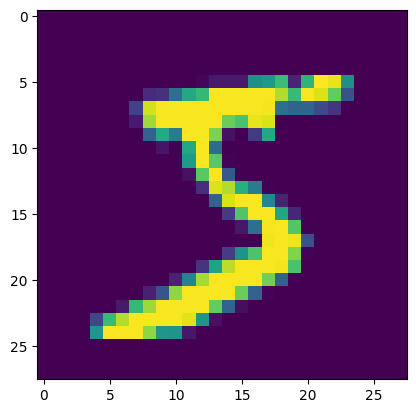

In [ ]:
# show the first input data object
plt.imshow(x_train[0])

In [ ]:
# check how many possible values are in the target variable
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# check what is the minimum and maximum value and data type of the features dataset
x_train.min(), x_train.max(), x_train.dtype

(0, 255, dtype('uint8'))

The minimum value is 0 and maximum value is 255.Datatype is integer

In [ ]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling) and that the values are floating point objects
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# the shape should have not changed
x_train.shape

(60000, 28, 28)

In [ ]:
#the number of pixels in the data is
28*28

784

# Build the first Artificial Neural Network
solve the problem as a regression - see slides for the appropriate choices

- use dense layers
- choose the right number of neurons in output to solve a _regression_ problem
- choose the right activation function on the last layer for a _regression_ problem
- chose the right loss function for a _regression_ problem


In [ ]:
# Model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Flatten input
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Dense layer with 128 neurons and ReLU
model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer dropping 20% of connections
model.add(tf.keras.layers.Dense(10))  # Dense layer with 10 neurons
model.add(tf.keras.layers.Dense(1))  # Output layer with 1 neuron

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

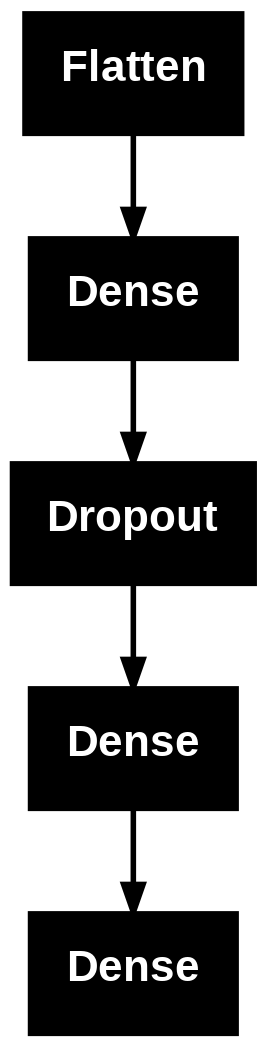

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)#This is to prevent overfitting during the model training process early when the model`s performance stops improving

In [ ]:
#train the model (did you make sure you are using GPUs??)
model.compile(optimizer = optimizer, loss = loss_fn,
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=500,callbacks=[early_stopping], validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1342 - loss: 1.8748 - val_accuracy: 0.1468 - val_loss: 1.2765
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1337 - loss: 1.8610 - val_accuracy: 0.1503 - val_loss: 1.3168
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1340 - loss: 1.8887 - val_accuracy: 0.1578 - val_loss: 1.2457
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1349 - loss: 1.8851 - val_accuracy: 0.1468 - val_loss: 1.4412
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1322 - loss: 1.8993 - val_accuracy: 0.1528 - val_loss: 1.2512
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1354 - loss: 1.8792 - val_accuracy: 0.1502 - val_loss: 1.2155
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1371 - loss: 1.9077 - val_accuracy: 0.1397 - val_loss: 1.2953
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1343 - loss: 1

the training_history object contains the loss curves: training loss as `training_history.history["loss"]` and validation loss as `training_history.history["val_loss"]` (note the validation_split argument to model.fit set to 10%).

Show the training and validation losses and comment: is the model overfitting? at what epoch did it start to overfit?

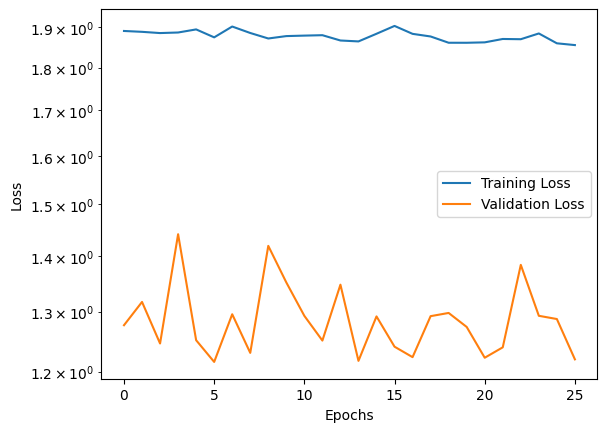

In [ ]:
plt.plot(training_history.history["loss"], label="Training Loss")
plt.plot(training_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log')  # Use a log scale for the y-axis
plt.legend()
plt.show()



In [ ]:
# is this model overfitting? how would you find out? how would you fix it?

The is not overfitting because the training loss is relatively stabled. The validation loss fluctuates significantly but does not seem to increase consistently, which means the model may not be necessarily be overfitting yet.The way I would figure out is if the training loss keeps decreasing (showing improvement), while the validation loss either stagnates or increases after a certain number of epochs which would mean that it is overfitting. If the model was overfitting, I would use Early Stopping and set the patience level to a smaller value.

In [19]:
#what is the accuracy of the model? use model.evaluat to assess it
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1505 - loss: 1.4566


[1.3153377771377563, 0.15729999542236328]

The model accuracy is 15.05%.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


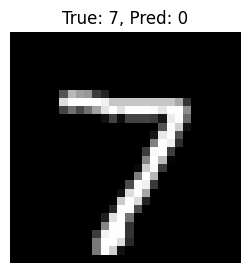

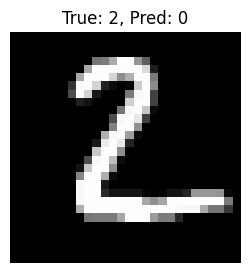

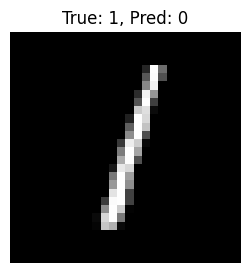

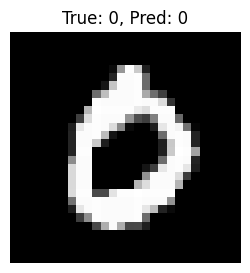

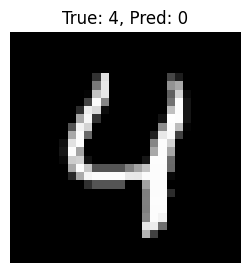

In [ ]:
# show the first 5 data points and corresponding predictions
# Get the first 5 data points
first_5_data = x_test[:5]
first_5_labels = y_test[:5]

# Generate predictions
predictions = model.predict(first_5_data)

# Display the first 5 data points and their predictions
for i in range(5):
    plt.figure(figsize=(3, 3))
    plt.imshow(first_5_data[i], cmap='gray')  # Assuming input is grayscale images
    plt.title(f"True: {first_5_labels[i]}, Pred: {predictions[i].argmax()}")
    plt.axis('off')
    plt.show()

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Build a ANN to solve the problem as a multiclass classification

see slides for the apprioriate choices
- use dense layers
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [ ]:
# modify the architecture hyperparametrs
prob_model = tf.keras.models.Sequential()
prob_model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Flatten input for 28x28 images
prob_model.add(tf.keras.layers.Dense(128, activation='relu'))  # Dense layer with 128 neurons and ReLU
prob_model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer with 20% dropout rate
prob_model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Final Dense layer with 10 neurons and Softmax activation
prob_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

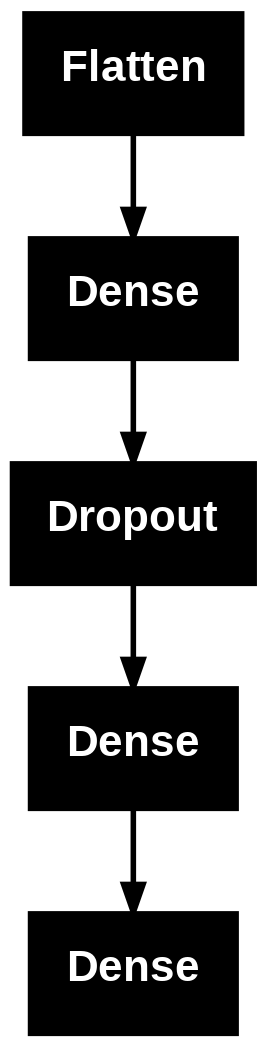

In [ ]:
tf.keras.utils.plot_model(model)

In [20]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = 'sparse_categorical_crossentropy'  # Used sparse categorical loss for integer labels
optimizer = 'adam'  # Adam optimizer
prob_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
prob_training_history = prob_model.fit(x_train, y_train, epochs=500, callbacks=[early_stopping] ,validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9175 - loss: 0.3412 - val_accuracy: 0.9482 - val_loss: 0.2717
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9187 - loss: 0.3185 - val_accuracy: 0.9515 - val_loss: 0.2447
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9213 - loss: 0.3110 - val_accuracy: 0.9540 - val_loss: 0.2158
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9226 - loss: 0.3013 - val_accuracy: 0.9553 - val_loss: 0.2375
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9273 - loss: 0.2920 - val_accuracy: 0.9533 - val_loss: 0.2277
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9251 - loss: 0.3001 - val_accuracy: 0.9515 - val_loss: 0.2349
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9256 - loss: 0.2794 - val_accuracy: 0.9493 - val_loss: 0.2222
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9237 - loss: 0

In [21]:
#what is the accuracy of the model? use model.evaluat to assess it
prob_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9421 - loss: 0.3602


[0.33682411909103394, 0.9463000297546387]

The model acuracy is 94.21%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


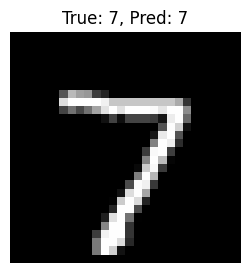

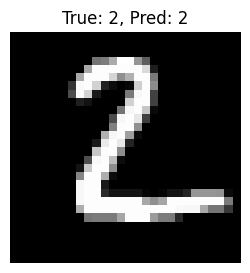

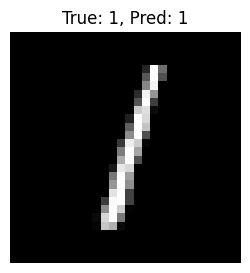

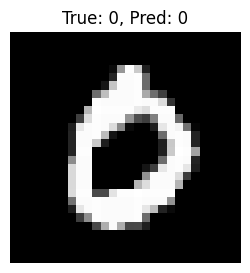

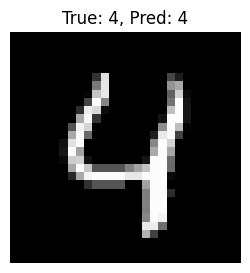

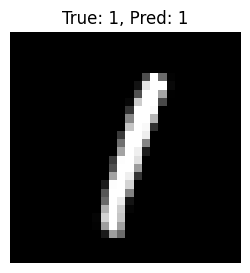

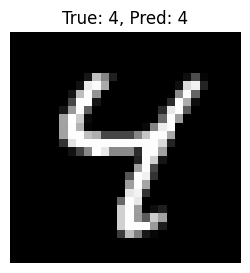

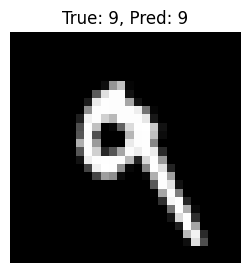

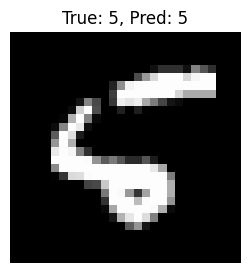

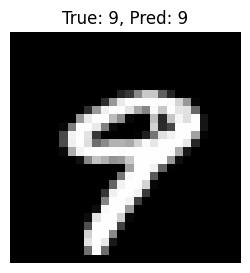

In [ ]:
# show the first 10 data points and corresponding predictions
# Get the first 10 data points and labels
first_10_data = x_test[:10]
first_10_labels = y_test[:10]

# Make predictions for the first 10 data points
predictions = prob_model.predict(first_10_data)

# Display the first 10 data points, true labels, and predictions
for i in range(10):
    plt.figure(figsize=(3, 3))
    plt.imshow(first_10_data[i], cmap='gray')  # Assuming grayscale images
    true_label = first_10_labels[i]
    predicted_label = np.argmax(predictions[i])  # Get the predicted class (highest probability)
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
    plt.show()
#result = prob_model.predict(x_test[:10])

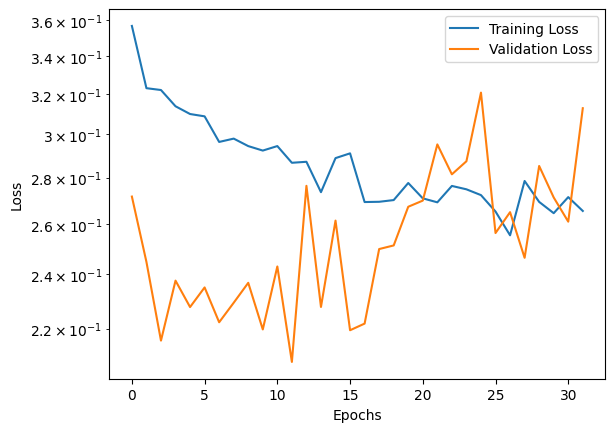

In [22]:
#show the loss curves and comment
plt.plot(prob_training_history.history['loss'], label='Training Loss')
plt.plot(prob_training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log') #use log scale for the y axis
# Add a legend
plt.legend()
# Show the plot
plt.show()

This plot compares the training loss(blue line) and validation loss(orange line) during a machine learning model's training over 30 epochs. The training loss decreases consistently, showing that the model is improving on the training data. However, the validation loss fluctuates significantly and increases in later epochs, indicating potential overfitting. This suggests the model may not generalize well to unseen data, emphasizing the need for regularization or early stopping.

# Build a CNN (convolutional neural network) to solve the problem as a multiclass classification

- you do not need the Flatten() layer anymore, the input size is not 728 but (28,28)
- use Conv2D layers and MaxPool2D layers alternating them appropriately
- use relu activation functions for the convolutional layers
- add a dense layer at the end for the prediction
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
# Output layer with softmax activation for multiclass classification
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5, 5, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=500, callbacks=[early_stopping], validation_split=0.1)

In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.2433


[0.1590447574853897, 0.9860000014305115]

In [ ]:
# show the first 10 data points and corresponding predictions
result = prob_model.predict(x_test[:10])
result

In [ ]:
#show the loss curves and comment
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log') #use log scale for the y axis